In [9]:
#under sample the majority class
import numpy as npy
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sbn
from imblearn.over_sampling import SMOTE
%matplotlib inline

train_data = pds.read_csv('trainData.csv')

In [2]:
from collections import Counter
counts = Counter(train_data.TenYearCHD)
counts

Counter({0.0: 2864, 1.0: 528})

In [3]:
x_inputs = train_data.iloc[:, 0:15]
y_label = train_data.iloc[:, -1]

In [4]:
from imblearn.under_sampling import RandomUnderSampler
rand_us = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rand_us.fit_resample(x_inputs, y_label)

In [66]:
'''from imblearn.under_sampling import ClusterCentroids
cc_sample = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc_sample.fit_resample(x_inputs, y_label)'''

In [5]:
column = x_inputs.columns
cls = ['TenYearCHD']
attri = pds.DataFrame(X_resampled, columns = column)
label = pds.DataFrame(y_resampled, columns = cls)
new_data_sample = pds.concat([attri,label], axis = 1)

In [6]:
new_data_sample

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,37.0,2.0,1.0,30.0,0.0,0.0,0.0,0.0,270.7,115.0,79.0,28.4,85.0,62.5,0.0
1,0.0,43.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,115.0,82.5,25.9,105.0,85.2,0.0
2,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,107.5,70.0,22.7,47.0,88.0,0.0
3,0.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,98.0,64.5,21.1,80.0,79.0,0.0
4,1.0,62.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.0,79.0,23.5,72.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,234.0,143.0,90.0,29.4,70.0,86.0,1.0
1052,0.0,60.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0,127.0,70.0,22.4,75.0,63.0,1.0
1053,1.0,43.0,4.0,1.0,25.0,0.0,0.0,0.0,0.0,245.0,126.0,88.5,23.2,92.0,73.9,1.0
1054,1.0,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,143.0,104.0,29.9,75.0,87.0,1.0


In [7]:
from sklearn.utils import shuffle
new_data_sample = shuffle(new_data_sample)
new_data_sample.reset_index(inplace=True, drop=True)
new_data_sample.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,55.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,232.0,170.0,92.0,26.1,96.0,74.0,1.0
1,0.0,58.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,267.0,157.0,94.0,33.3,92.0,205.0,1.0
2,0.0,49.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0,120.0,70.5,23.3,87.0,84.0,0.0
3,0.0,42.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,220.0,129.0,81.0,19.7,80.0,61.0,0.0
4,0.0,65.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,140.0,82.0,20.5,58.0,84.3,1.0
5,1.0,47.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,286.0,148.0,98.0,30.0,80.0,93.0,1.0
6,0.0,65.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,149.0,96.0,29.8,90.0,80.0,1.0
7,1.0,51.0,4.0,1.0,20.0,0.0,0.0,0.0,0.0,215.0,115.0,69.0,25.7,68.0,77.0,0.0
8,1.0,40.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,234.0,116.0,79.5,24.8,62.0,87.0,0.0
9,0.0,67.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,303.0,204.0,96.0,27.9,75.0,394.0,1.0


In [70]:
columns =(new_data_sample.columns)
x = ''
st = [x+y for y in columns]
st = ','.join([str(elem) for elem in st])
st

'male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD'

In [71]:
#npy.savetxt('trainDataUnderSampleCC.csv', new_data_sample, delimiter=',', fmt='%f', newline='\n', header = st)

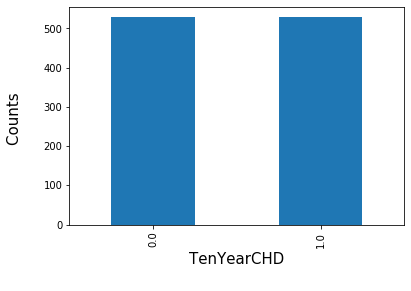

In [10]:
pds.value_counts(new_data_sample['TenYearCHD']).plot.bar()
mplt.xlabel('TenYearCHD\n ', fontsize=15)
mplt.ylabel('Counts \n', fontsize=15)
mplt.savefig('underClass.png')